In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,iq,placement
0,9.27,105,0
1,6.20,129,1
2,6.40,112,1
3,7.27,138,1
4,7.28,127,1


In [4]:
df.shape

(1000, 3)

In [5]:
import matplotlib.pyplot as plt

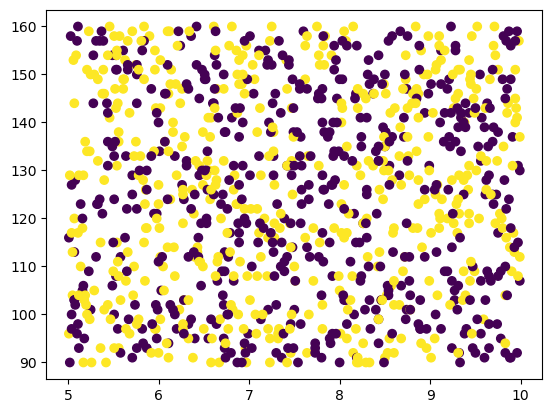

In [7]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X

,cgpa,iq
0,9.27,105
1,6.20,129
2,6.40,112
3,7.27,138
4,7.28,127
...,...,...
995,8.90,94
996,6.41,132
997,9.45,111
998,7.94,156


In [11]:
y.shape

(1000,)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train

,cgpa,iq
466,9.23,160
297,8.21,90
960,5.66,151
710,9.89,149
851,9.61,143
...,...,...
44,7.41,153
662,5.53,151
137,6.00,127
719,8.03,149


In [15]:
y_train

466    0
297    1
960    0
710    0
851    1
      ..
44     1
662    0
137    1
719    0
222    1
Name: placement, Length: 900, dtype: int64

In [16]:
X_test

,cgpa,iq
378,9.97,115
182,5.17,106
869,8.75,132
489,9.94,157
570,5.03,158
...,...,...
250,9.70,156
685,9.39,139
64,8.68,106
148,9.78,95


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train

array([[ 1.21224505,  1.68757638],
       [ 0.50019545, -1.6723235 ],
       [-1.27992854,  1.25558925],
       ...,
       [-1.04257868,  0.10362358],
       [ 0.37453964,  1.15959211],
       [-0.94484638,  1.25558925]])

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[ 1.72883005, -0.47235926],
       [-1.62199159, -0.90434639],
       [ 0.87716289,  0.34361643],
       [ 1.70788742,  1.54358067],
       [-1.71972388,  1.59157924],
       [-1.54520192,  1.39958496],
       [ 0.22794119,  0.05562501],
       [ 1.13545539,  1.44758353],
       [ 1.70788742,  0.96759784],
       [ 1.68694478,  0.29561786],
       [-0.03035131, -1.33633352],
       [-1.0355978 ,  0.43961357],
       [-1.41954611,  0.77560356],
       [-0.01638955, -1.19233781],
       [ 0.55604248, -1.6723235 ],
       [ 0.61887038,  1.01559641],
       [ 0.08832362, -0.42436069],
       [-0.74240091, -0.5683564 ],
       [-1.34973733,  0.63160785],
       [ 0.68867917,  0.67960642],
       [ 0.04643835,  1.06359498],
       [ 1.12847451, -0.23236641],
       [-0.93088462, -1.14433924],
       [-0.00242779,  0.8716007 ],
       [ 0.40944403, -1.43233065],
       [-1.0984257 ,  1.06359498],
       [-1.28690942, -0.13636927],
       [-1.14729185, -0.85634782],
       [ 1.03772309,

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
# model Training
clf.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [27]:
y_test

378    0
182    0
869    0
489    0
570    0
      ..
250    1
685    0
64     0
148    0
552    0
Name: placement, Length: 100, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_pred)

0.51

In [32]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

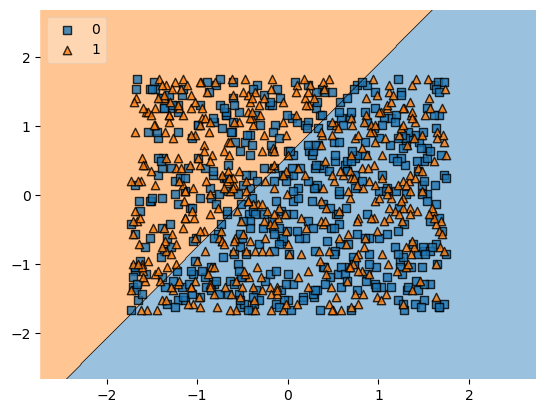

In [33]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [34]:
import pickle

In [35]:
pickle.dump(clf, open('model.pkl', 'wb'))